## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
import pandas as pd 
data = pd.read_csv("ab_data.csv")
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
data.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
un = data["user_id"].unique()
len(un)

290584

d. The proportion of users converted.

In [6]:
pro = (data[data["converted"] == 1].count() / data["user_id"].count()) *100
pro[0]

11.965919355605511

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
no_treat_new = data[(data["group"] == "treatment") & (data["landing_page"] != "new_page")]
no_treat_new.count()[0]

1965

f. Do any of the rows have missing values?

In [8]:
answer = data[data.isnull().any(axis=1)].count()[0]
missing = lambda x: print("No") if x == 0 else print ("Yes")
missing(answer)

No


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
no_control_old = data[(data["group"] == "control") & (data["landing_page"] != "old_page")]

In [10]:
df2 = pd.concat([data,no_control_old , no_control_old, no_treat_new, no_treat_new ]).drop_duplicates(keep=False)
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [11]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


a. How many unique **user_id**s are in **df2**?

In [12]:
un2 = df2["user_id"].unique()
len(un2)

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
value = df2[df2.duplicated('user_id')]
value

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [14]:
value['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
value["landing_page"]

2893    new_page
Name: landing_page, dtype: object

In [16]:
value["group"]

2893    treatment
Name: group, dtype: object

In [17]:
value["converted"]

2893    0
Name: converted, dtype: int64

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2 = pd.concat([df2,value]).drop_duplicates(keep=False)

In [19]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
pv = (df2[df2["converted"] == 1].count() / df2["converted"].count())[0]
pv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
pc = (df2[df2["group"] == "control"].count() / df2["group"].count())[0]
pc

0.49993805577733119

In [22]:
#P(pv|pc) = P(pv ∩ pc) / P(pc)
pv_pc = (df2[(df2["group"] == "control") & (df2["converted"] == 1)].count()/ df2["converted"].count())[0]
PvGivenPc = pv_pc / pc
PvGivenPc

0.12038630450046119

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
#P(pv|~pc) = P(pv ∩ ~pc) / P(~pc)
pv_pt = (df2[(df2["group"] == "treatment") & (df2["converted"] == 1)].count()/ df2["converted"].count())[0]
pv_pt

0.059411392230817942

In [24]:
PvGivenPt = pv_pt / (1-pc)
PvGivenPt

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
df2[df2["landing_page"] == "new_page"].count() / df2["landing_page"].count()

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Depending on the answers in a, b, and c: both control and treatement has no difference in results and no evidence that the new treatment page leads to more conversions.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

As we saw that The null hypothese H0 (p_new - p_old <= 0) while the alternative one is H1 (p_new - p_old > 0)

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [26]:
p_new = df2.query('converted == 1')['user_id'].nunique()/df2['user_id'].nunique()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [27]:
p_old = df2.query('converted == 1')['user_id'].nunique()/df2['user_id'].nunique()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [28]:
n_new = df2.query('group == "treatment"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [29]:
n_old = df2.query('group == "control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
old_page_converted

array([0, 0, 1, ..., 0, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
#the difference with rounding
diff_obs = round(old_page_converted.mean() - new_page_converted.mean())

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [33]:
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    samp = df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
    
    p_diffs.append(round(new_page_converted.mean() - old_page_converted.mean()))

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

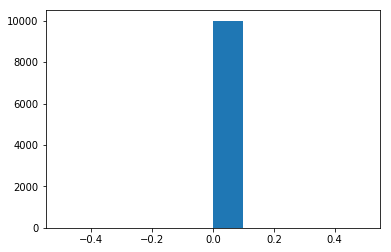

In [34]:
# Convert to numpy array
p_diffs = np.array(p_diffs)

# Plot sampling distribution
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

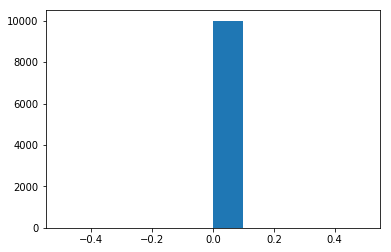

In [35]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
# plot null distribution
plt.hist(null_vals);

In [36]:
# computed actual new
converted_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
actual_cn = converted_new/ n_new 

In [37]:
#compute actual old 
converted_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
actual_co = converted_old/ n_new 

In [38]:
obs_diff = actual_cn - actual_co
obs_diff

-0.001548413736150292

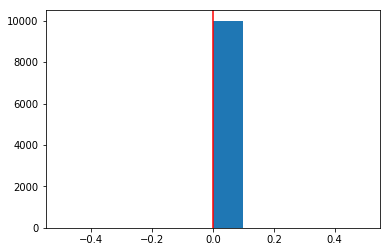

In [39]:
# plot line for observed statistic
plt.hist(null_vals);
plt.axvline(x = diff_obs, color = 'red');

In [40]:
(null_vals > obs_diff).mean()

1.0

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

What I've computed was the Type I error rate which is 5%, then P_old > Alpha that is why I could approve the null.
At the end, we claim that an old page is probably converted more than the new one.

It is called P-Value.

The P-Value is known to be The probability of getting the statistic from the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

convert_old = converted_new
convert_new = converted_old
#n_old = n_old
#n_new = n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [42]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], np.array([n_new, n_old]))
z_score, p_value

(1.2616957421858055, 0.20705828960655481)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

As z-score didn't reach the 1.95996 we claim that we fail to reject the null hypothesis that the new users have higher rate in converting than the old users.

Both doesn't have any difference in results and yes they agree with the finding in part j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

I think we are going to use the Logistic regression as we need a value between 2 values. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [52]:
df2['intercept'] = 1
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0


In [58]:
df2['landing_page'] = pd.get_dummies(df2['landing_page'] )
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,1,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,1,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,0,0,1,1,0


In [65]:
df2['ab_page'] = df2['group']
df2['ab_page'] = pd.get_dummies(df2['ab_page'])['treatment']
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,1,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,1,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,0,0,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [109]:
import statsmodels.api as sm
log_reg = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
log_reg

In [113]:
log_model = log_reg.fit() 

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [114]:
log_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-09-25 20:02 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page is 0.1899 which is close the previous values. The null hypothsis is "no difference between the treatment and control group" which means that when ab_page = 1, converted = 0
The alternative hypothesis says there is a difference which means that when ab_page = 1, converted is more likely to be 1.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

No current relation is claimed to say that any of the treatment or control pages has more advantage than the other in the eyes of users. 
we have no choice but testing new factors that are not colinear.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [135]:
country_data = pd.read_csv('countries.csv')
country_data.head(3)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK


In [137]:
country_data.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [144]:
df2 = df2.merge(country_data, on ='user_id', how='left')
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country_x,country_y,country
0,851104,2017-01-21 22:11:48.556739,control,1,0,1,0,1,0,US,US,US
1,804228,2017-01-12 08:01:45.159739,control,1,0,1,0,1,0,US,US,US


In [149]:
df2[['CA','UK','US']] = pd.get_dummies(df2['country'])

In [152]:
model2 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
results = model2.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-09-25 20:29 AIC:              212780.6124
No. Observations:   290582           BIC:              212822.9310
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7602  0.0000  -2.0067  -1.9718
ab_page      -0.0150    0.0114    -1.3083  0.1908  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5165  0.1294  -0.0935   0.0119
UK            0.0099    0.0133     0.7425  0.4578  -0.0162   0.0359
==================================================================

"""

no real differece shown by the countries on the converted pages

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

*Provide the summary results, and your conclusions based on the results.*

In [155]:
df2['US Page'] = df2['US']*df2['ab_page']
df2['UK Page'] = df2['UK']*df2['ab_page']
df2['CA Page'] = df2['CA']*df2['ab_page']
model = sm.Logit(df2['converted'], df2[['intercept', 'CA Page', 'UK Page']])
final_results = model.fit()
final_results.summary2()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-09-25 20:34 AIC:              212778.5289
No. Observations:   290582           BIC:              212810.2678
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9963    0.0062  -322.0470  0.0000  -2.0084  -1.9841
CA Page      -0.0752    0.0376    -1.9976  0.0458  -0.1490  -0.0014
UK Page       0.0149    0.0173     0.8612  0.3891  -0.0190   0.0487
==================================================================

"""

I see that according to what we did in this test we can't reject the null hypothesis and no need to change to a new page as the old acts nearly in the same way. 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])